# Project: Wrangling and Analyze Data

In [1274]:
#import relevant libraries
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1275]:
#I manually downloaded 'twitter-archive-enhanced.csv' and imported in with read_csv
#Put the data in dataframe called df_t_arch.
df_t_arch = pd.read_csv('twitter-archive-enhanced.csv')
df_t_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [1276]:
#download image predictions.tsv using 

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(url)

with open("image_predictions.tsv",'wb') as f:
  
    f.write(r.content)

In [1277]:
#open "image_predictions.tsv" file, put it in dataframe called df_img_p.

df_img_p = pd.read_csv("image_predictions.tsv", sep = "\t")
df_img_p.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465,True,collie,0.157,True,Shetland_sheepdog,0.061,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.507,True,miniature_pinscher,0.074,True,Rhodesian_ridgeback,0.072,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596,True,malinois,0.139,True,bloodhound,0.116,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408,True,redbone,0.361,True,miniature_pinscher,0.223,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560,True,Rottweiler,0.244,True,Doberman,0.155,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [1279]:

import tweepy
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = "lJ**"
consumer_secret = "SS**"
access_token = "14**"
access_token ="zc**"

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token)

api = tweepy.API(auth, wait_on_rate_limit=True)


# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_t_arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e :
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 7985

Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 759846353224826880
Fail
890: 7597

Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166: 722974582966214656
Fail
1167:

Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441: 696886256886657024
Fail
1442:

Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716: 680221482581123072
Fail
1717:

Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990: 672828477930868736
Fail
1991:

Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264: 667544320556335104
Fail
2265:

**Above, I could not get the Elevated access via the Developer Portal, so my keys did not work for querying additional data via Tweepy. Therefore I had to download "tweet_json.txt" from the Udacity site.**

**Below, download "tweet_json.txt" programmatically using requests function**

In [17]:
#download "tweet_json.txt" programmatically using requests function

url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'

r = requests.get(url)

with open("tweet-json.txt",'wb') as f:
  
    f.write(r.content)


**Read "tweet-json.txt with the read_json function**

In [1280]:
pd.read_json('tweet-json.txt', lines=True)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.000,0.000,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.000,0.000,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.000,0.000,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.000,0.000,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.000,0.000,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.000,0.000,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.000,0.000,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.000,0.000,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.000,0.000,en,NaN,NaN,NaN,NaN


**Check columns of "tweet-json.txt**

In [1281]:
#check columns of "tweet-json.txt"
pd.read_json('tweet-json.txt', lines=True).columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

**Put 'id', 'retweet_count', 'favorite_count' into a dataframe called `df_json`**

In [1282]:
#put 'id', 'retweet_count', 'favorite_count' into a dataframe called df_json
df_json = pd.read_json('tweet-json.txt', lines=True)[['id','retweet_count','favorite_count']]

**Check `df_json` head**

In [1283]:
df_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.


**Check info of `df_t_arch` table**

In [1284]:
df_t_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

* **Above, the tweet_id, in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_id need to be changed to strings. Also the timestamps need to be changed into datetime format.**

**Check head of `df_t_arch` table**

In [1285]:
df_t_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


* **Above, the doggo,floofer,pupper,puppo dog stages all have data in separate columns. The data in the columns need to be combined in one column.**

**Use describe() function to get more information**

In [372]:
df_t_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


**Check for any null values**

In [877]:
df_t_arch.isnull().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

**The min value of numerator is 0. Below, check rows where numerator is 0.**

In [1287]:
df_t_arch[df_t_arch.rating_numerator==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,746885919387574272.000,4196983835.000,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


* **Above, index 1016 is a retweet, so it will be filtered when the rows with "in_reply_to_status_id" values are deleted.**
* **Below, check the expanded url of index 315**

In [378]:
df_t_arch.iloc[315].expanded_urls

'https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1'

* **Above, when one checks the url in an internet browser, the tweet is a retweet of a twitter account plagiarizing We Rate Dogs. The tweet needs to be deleted as the tweet is not a rating of a dog.**

* **Below, check rows where denominator is 0**

In [379]:
df_t_arch[df_t_arch.rating_denominator==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


* **Above, since index 313 is a retweet, it will be filtered when the rows with "in_reply_to_status_id" values are deleted.**

**Check if there are any duplicated tweet ids.**

In [1288]:
df_t_arch.tweet_id.duplicated().sum()

0

* **Check number of rows where in_reply_to_status_id exists.**

In [381]:
df_t_arch.in_reply_to_status_id.notnull().sum()

78

* **Check number of rows where in_reply_to_user_id exists.**

In [382]:
df_t_arch.in_reply_to_user_id.notnull().sum()

78

* **Above, the rows where in_reply_to_status_id, and in_reply_to_user_id is not null will need to be deleted as they are a reply to another tweet.**

* **Below, check if there are any null values in column "rating_numerator".** 

In [1289]:
df_t_arch.rating_numerator.isnull().sum()

0

* **Check if there are any null values in column "rating_denominator".** 

In [384]:
df_t_arch.rating_denominator.isnull().sum()

0

* **Check the most common dog names by using value_counts() function.** 

In [385]:
df_t_arch.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
           ... 
Howie         1
Asher         1
Florence      1
Sprout        1
Yukon         1
Name: name, Length: 957, dtype: int64

* **Above, there are 745 'None' entries. And there are 55 entries with 'a'.**

* **Below, check a sample of the rows with name as 'None. Visually assess the text. There is a text that says We only rate dogs. Please stop sending in your.... in index 1102.**

In [386]:
df_t_arch[df_t_arch.name=='None'].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2321,666435652385423360,NaN,NaN,2015-11-17 02:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Can you behave? You're ruining my wedding day...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/666435652...,10,10,None,None,None,None,None
2006,672267570918129665,NaN,NaN,2015-12-03 04:14:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you accidentally open up the front facing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672267570...,10,10,None,None,None,None,None
2215,668542336805281792,NaN,NaN,2015-11-22 21:31:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",There's a lot going on here but in my honest o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668542336...,10,10,None,None,None,None,None
939,753039830821511168,NaN,NaN,2016-07-13 01:34:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",So this just changed my life. 13/10 please enj...,NaN,NaN,NaN,https://vine.co/v/5W2Dg3XPX7a,13,10,None,None,None,None,None
1102,735274964362878976,NaN,NaN,2016-05-25 01:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in your...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735274964...,11,10,None,None,None,None,None


* **Below, get the expanded url of tweet in index 1102.**

In [1290]:
df_t_arch.loc[1102].expanded_urls

'https://twitter.com/dog_rates/status/735274964362878976/photo/1,https://twitter.com/dog_rates/status/735274964362878976/photo/1'

* **Above, the tweet is of a dog dressed as a human. It is a dog picture with a rating, so it will stay in the dataframe.**

* **Below, check the first 10 rows where the name is 'a'.**

In [387]:
df_t_arch[df_t_arch.name=='a'].head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


* **Above, visually assessing, the text in index 1017 says "This is a carrot. We only rate dogs." Also, it does not seem "a" is not a name for a dog, but somehow a data which randomly was processed into the "name" column. The "a" data in the "name" column needs to be replaced with "None"**

* **Below check the expanded url of the tweet in index 1017.**

In [388]:
df_t_arch.iloc[1017]['expanded_urls']

'https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1'

* **Above, the url has a picture of a dog dressed as a carrot. The dog also has a rating. This row will be kept in the dataframe. It seems many tweets with the text "We only rate dogs." are dog pictures of dogs dressed as other objects.**

* **Below, check info of `df_img_p` table.**

In [1291]:
df_img_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


* **Check head of `df_img_p` table.**

In [1293]:
df_img_p.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465,True,collie,0.157,True,Shetland_sheepdog,0.061,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.507,True,miniature_pinscher,0.074,True,Rhodesian_ridgeback,0.072,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596,True,malinois,0.139,True,bloodhound,0.116,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408,True,redbone,0.361,True,miniature_pinscher,0.223,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560,True,Rottweiler,0.244,True,Doberman,0.155,True


* **Check if there are any null values in `df_img_p` table.**

In [1294]:
df_img_p.isnull().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

* **Below, use describe function in `df_img_p` table.**

In [391]:
df_img_p.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


* **Check if any tweet_ids were duplicated in `df_img_p` table.**

In [1292]:
df_img_p.tweet_id.duplicated().sum()

0

* **Check if any jpg_urls were duplicated in `df_img_p` table.**

In [393]:
df_img_p.jpg_url.duplicated().sum()

66

* **Further check duplicated jpg_urls with value_counts.**

In [394]:
df_img_p.jpg_url.value_counts()

https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg    2
https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg                                            2
https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg                                            2
https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/Cj0xdMBVAAEbDHp.jpg                                            1
https://pbs.twimg.com/media/CmkBKuwWgAAamOI.jpg                                            1
https://pbs.twimg.com/media/CeW1tERWAAAA9Q2.jpg                                            1
https://pbs.twimg.com/media/C-L-aIYXgAIR0jY.jpg                                            1
https://pbs.twimg.com/media/CcBwOn0XEAA7bNQ.jpg                       

* **Above, since we want dog ratings of distinct dog pictures, the rows of duplicated jpg_urls need to be deleted once `df_img_p` is joined with  df_t_arch**

* **Below, check info of `df_json`.**

In [1295]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


* **Check if there are any null values in `df_json`.**

In [878]:
df_json.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

* **Use describe function in `df_json`.**

In [1296]:
df_json.describe()

,id,retweet_count,favorite_count
count,2354.000,2354.000,2354.000
mean,742697816435063552.000,3164.797,8080.969
std,68528120712910648.000,5284.770,11814.771
min,666020888022790144.000,0.000,0.000
25%,678397510244808704.000,624.500,1415.000
50%,719459571111233536.000,1473.500,3603.500
75%,799305849241918464.000,3652.000,10122.250
max,892420643555336192.000,79515.000,132810.000


* **Check rows where values in "favorite_count" is 0.**

In [655]:
df_json[df_json.favorite_count==0]

,id,retweet_count,favorite_count
31,886054160059072513,108,0
35,885311592912609280,19297,0
67,879130579576475649,7181,0
72,878404777348136964,1349,0
73,878316110768087041,6965,0
...,...,...,...
1021,746521445350707200,1110,0
1041,743835915802583040,2387,0
1240,711998809858043904,138,0
2257,667550904950915073,37,0


* **Check rows where values in "retweet_count" is 0.**

In [656]:
df_json[df_json.retweet_count==0]

,id,retweet_count,favorite_count
290,838085839343206401,0,150


### Quality issues
1.In the `df_t_arch` table, the data in the columns tweet_id need to be changed from integer to string. The data in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,  retweeted_status_user_id need to be changed from float to string.

2.In the `df_t_arch` table, the columns timestamp, and retweeted_status_timestamp need to be changed into datetime format and made into seperate columns for a more readable date format in month/day/year. Separate columns for Year and Month should be made for data analysis.

3.In the `df_t_arch` table retweets need to be deleted by filtering out rows where "in_reply_to_user_id" and "in_reply_to_status_id" have values.

4.In the `df_t_arch` table retweets need to be deleted by filtering out rows where "retweeted_status_id" and "retweeted_status_user_id" have values.

5.In the `df_t_arch` table, index 315 has a rating numerator of 0 which means it's highly suspectable that it does not have a rating. After examining the expanded url 'https://twitter.com/dog_rates/status/835152434251116546/photo/1' of this index, it turns out it was a tweet about another twitter account plagiarizing We Rate Dogs. This particular tweet does not have a dog rating and should be deleted from the dataframe.

6.In the `df_t_arch` table the 'a's in the name column should be changed to 'None'.

7.In the `df_t_arch` table, the characters around  around the links in the "source" column should be stripped.

8.In the `df_json` table data in "retweet_count", "favorite_count" column need to be changed from float to integer.

9.In the `df_img_p` table duplicate "jpg_url" rows should be deleted as duplicate images have been predicted.

10.After  `df_img_p_c` is left joined with `df_t_arch_c` table, since we only want tweets with images, delete rows where "jpg_url" is null and "expanded_urls" does not have picture.

### Tidiness issues
1.The values of the columns "doggo","floofer",	"pupper", "puppo" of df_t_arch table need to consolidated into one column called "dog_stage".

2.The columns of the df_img_p table should be part of the df_t_arch table.

3.The columns "retweet_count" and "favorite_count" of the df_json table should be part of the df_t_arch table.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [1309]:
# Make copies of original pieces of data
df_t_arch_c = df_t_arch.copy()
df_img_p_c = df_img_p.copy()
df_json_c = df_json.copy()

### Issue #1:The columns "retweet_count" and "favorite_count" of the df_json table should be part of the df_t_arch table.

#### Define: Change column name "id" in  df_json_c table  to "tweet_id". Left join "df_json_c" table into "df_t_arch_c" on "tweet_id" with "df_t_arch_c" on left using the merge function.

#### Code

In [1310]:
#rename 'id' in df_json_c table to 'tweet_id'
df_json_c.rename(columns = {'id' : 'tweet_id'}, inplace=True)

In [1311]:
#merge 'df_json_c' to df_t_arch_c on left on column tweet_id' so 'retweet_count' and 'favorite_count'
#can be part of the df_t_arch_c table.
df_t_arch_c = pd.merge(df_t_arch_c, df_json_c, how ='left', on='tweet_id')

In [1312]:
#check head of merged table
df_t_arch_c.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853.000,39467.000
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514.000,33819.000
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328.000,25461.000
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964.000,42908.000
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774.000,41048.000


#### Test

In [1313]:
#add the list of df_t_arch_columns and df_json_c columns into a series and 
#check for duplicates
columns = pd.Series(list(df_t_arch_c)+list(df_json_c))
columns[columns.duplicated()]

19          tweet_id
20     retweet_count
21    favorite_count
dtype: object

### Issue #2: The columns of the df_img_p table should be part of the df_t_arch table.

**Left join `df_img_p_c` table into `df_t_arch_c` on "tweet_id" with `df_t_arch_c` on left using the merge function.**

In [1314]:
##merge 'df_img_p_c' to df_t_arch_c on left on column tweet_id' so various columns in df_img_p_c'
#can be part of the df_t_arch_c table.
df_t_arch_c = pd.merge(df_t_arch_c,df_img_p_c,how='left',on='tweet_id')

In [1315]:
#Check 10 sample rows of df_t_arch_c.
df_t_arch_c.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1846,675822767435051008,NaN,NaN,2015-12-12 23:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10s ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675822767...,...,1.000,Pomeranian,0.461,True,chow,0.203,True,Pekinese,0.133,True
1878,675047298674663426,NaN,NaN,2015-12-10 20:19:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a fluffy albino Bacardi Columbia mix. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675047298...,...,1.000,Samoyed,0.978,True,chow,0.007,True,Pomeranian,0.006,True
678,789268448748703744,NaN,NaN,2016-10-21 00:53:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stella. She's happier than I will ever...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789268448...,...,1.000,malamute,0.813,True,Siberian_husky,0.121,True,Eskimo_dog,0.024,True
1360,703268521220972544,NaN,NaN,2016-02-26 17:20:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Friday here's a sleepy pupper 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703268521...,...,1.000,wool,0.525,False,fur_coat,0.236,False,kuvasz,0.038,True
1103,735256018284875776,NaN,NaN,2016-05-24 23:47:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kellogg. He accidentally opened the fr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735256018...,...,1.000,Staffordshire_bullterrier,0.523,True,French_bulldog,0.351,True,doormat,0.028,False
1772,678278586130948096,NaN,NaN,2015-12-19 18:19:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another spooky pupper here. Most definitely fl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678278586...,...,1.000,Maltese_dog,0.898,True,Lhasa,0.036,True,Tibetan_terrier,0.017,True
856,764259802650378240,NaN,NaN,2016-08-13 00:38:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kota and her son Benedict. She doesn't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/764259802...,...,1.000,German_shepherd,0.974,True,malinois,0.026,True,kelpie,0.000,True
1027,746056683365994496,NaN,NaN,2016-06-23 19:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arlen and Thumpelina. They are best pa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746056683...,...,1.000,Shetland_sheepdog,0.433,True,collie,0.336,True,borzoi,0.177,True
2071,671115716440031232,NaN,NaN,2015-11-29 23:57:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Phred. He isn't steering, looking at the ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671115716...,...,1.000,malinois,0.406,True,kelpie,0.143,True,dingo,0.130,False
341,832215726631055365,NaN,NaN,2017-02-16 13:11:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Moreton. He's the Good ...,793286476301799424.000,4196983835.000,2016-11-01 03:00:09 +0000,https://twitter.com/dog_rates/status/793286476...,...,1.000,Afghan_hound,0.275,True,borzoi,0.142,True,doormat,0.110,False


#### Test

In [1316]:
#add the list of df_t_arch_columns and 'df_img_p_c' columns into a series and 
#check for duplicates
columns_1 = pd.Series(list(df_t_arch_c)+list(df_img_p_c))
columns_1[columns_1.duplicated()]

30    tweet_id
31     jpg_url
32     img_num
33          p1
34     p1_conf
35      p1_dog
36          p2
37     p2_conf
38      p2_dog
39          p3
40     p3_conf
41      p3_dog
dtype: object

### Issue #3: The values of the columns "doggo","floofer",	"pupper", "puppo" of df_t_arch table need to consolidated into one column called "dog_stage".

#### Define: Add all the string values of the columns "doggo","floofer","pupper", "puppo" of `df_t_arch table` into a column called "dog_stage". Find all unique value combinations using the .unique() function. Clean the values in `df_t_arch['dog_stage']` column using a function called "dog_stages" and a for loop going through all the values of the column.

#### Code

In [1317]:
#Add all the string values of columns 'doggo','floofer','pupper','puppo' into a new column
#called "dog_stage"
df_t_arch_c['dog_stage'] = df_t_arch_c['doggo']+','+df_t_arch_c['floofer']+','+df_t_arch_c['pupper']+','+df_t_arch_c['puppo']

In [1318]:
#Check 5 sample values in the new "dog_stage" column.
df_t_arch_c['dog_stage'].sample(5)

1940    None,None,None,None
1754    None,None,None,None
894     None,None,None,None
878     None,None,None,None
62      None,None,None,None
Name: dog_stage, dtype: object

In [1319]:
#Find all unique value combinations using the .unique() function.
df_t_arch_c['dog_stage'].unique()

array(['None,None,None,None', 'doggo,None,None,None',
       'None,None,None,puppo', 'None,None,pupper,None',
       'None,floofer,None,None', 'doggo,None,None,puppo',
       'doggo,floofer,None,None', 'doggo,None,pupper,None'], dtype=object)

In [1320]:
#Make function called dog_stages which will clean the values in the dog_stage column.
def dog_stages(data):
    if data == 'None,None,None,None':
        return 'None'
    elif data == 'doggo,None,None,None':
        return 'doggo'
    elif data == 'None,None,None,puppo':
        return 'puppo'
    elif data == 'None,None,pupper,None':
        return 'pupper'
    elif data == 'None,floofer,None,None':
        return 'floofer'
    elif data == 'doggo,None,None,puppo':
        return 'doggo,puppo'
    elif data == 'doggo,floofer,None,None':
        return 'doggo,floofer'
    elif data == 'doggo,None,pupper,None':
        return 'doggo,pupper'
    else:
        return data

In [1321]:
#Apply function dog_stages on all values in the dog_stage column using a for loop.
for x in df_t_arch_c['dog_stage']:
    df_t_arch_c['dog_stage'] = df_t_arch_c['dog_stage'].apply(dog_stages)

In [1322]:
#Check 10 samples of the cleaned "dog_stage" column.
df_t_arch_c['dog_stage'].sample(10)

2283    None
2337    None
301     None
152     None
1942    None
1020    None
2085    None
1438    None
509     None
1280    None
Name: dog_stage, dtype: object

#### Test

In [1323]:
#Check unique values in 'dog_stage' column.
df_t_arch_c['dog_stage'].unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

In [1324]:
#Rows where new 'dog_stage' column has 'None' value.
dog_stage_none = df_t_arch_c[df_t_arch_c['dog_stage']=='None']

In [1325]:
#Rows where all 4 'doggo','floofer','pupper','puppo' columns has 'None' value.
dog_all_none = df_t_arch_c[(df_t_arch_c['doggo']=='None')&(df_t_arch_c['floofer']=='None')&(df_t_arch_c['pupper']=='None')&(df_t_arch_c['puppo']=='None')]

In [1326]:
#See if there is a difference in the index in the rows of dog_stage_none and dog_all_none
idx1 = dog_stage_none.index
idx2 = dog_all_none.index
idx1.difference(idx2)

Int64Index([], dtype='int64')

* **Above, There is no difference.**

* **Below, Do the index comparison on rows with multiple dog_stage values to see if the consolidation of "doggo","floofer",	"pupper", "puppo" columns into the "dog_stage" column was done successfully.**

In [1327]:
#Indexes where new 'dog_stage' column have 'doggo,puppo' value.
idx1 = df_t_arch_c[df_t_arch_c['dog_stage']=='doggo,puppo'].index
#Rows where 'doggo' and 'puppo' columns each have 'doggo' and 'puppo' values.
idx2 = df_t_arch_c[(df_t_arch_c['doggo']=='doggo')&(df_t_arch_c['puppo']=='puppo')].index
#See if there is a difference in the indexes
idx1.difference(idx2)

Int64Index([], dtype='int64')

In [1328]:
#Indexes where new 'dog_stage' column has 'doggo,floofer' value.
idx1 = df_t_arch_c[df_t_arch_c['dog_stage']=='doggo,floofer'].index
#Rows where 'doggo' and 'floofer' columns each have 'doggo' and 'floofer' values.
idx2 = df_t_arch_c[(df_t_arch_c['doggo']=='doggo')&(df_t_arch_c['floofer']=='floofer')].index
#See if there is a difference in the indexes
idx1.difference(idx2)

Int64Index([], dtype='int64')

In [1329]:
#Indexes where new 'dog_stage' column have 'doggo,pupper' value.
idx1 = df_t_arch_c[df_t_arch_c['dog_stage']=='doggo,pupper'].index
#Rows where 'doggo' and 'pupper' columns each have 'doggo' and 'pupper' values.
idx2 = df_t_arch_c[(df_t_arch_c['doggo']=='doggo')&(df_t_arch_c['pupper']=='pupper')].index
#See if there is a difference in the indexes
idx1.difference(idx2)

Int64Index([], dtype='int64')

* **There were no differences in the indexes of the combination of 'doggo,puppo', 'doggo,floofer' and 'doggo,pupper' values. The column consolidation was done successfully.**

In [1330]:
#Drop 'doggo', 'puppo', 'pupper', 'floofer' columns.
df_t_arch_c.drop(columns=['doggo', 'puppo', 'pupper', 'floofer'],inplace=True)

In [1331]:
#Check columns of tidied dataframe.
df_t_arch_c.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'retweet_count', 'favorite_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage'],
      dtype='object')

### Issue #4:In the `df_t_arch` table, the data type in the columns "tweet_id" need to be changed from integer to string. The data in "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id",  "retweeted_status_user_id" need to be changed from float to string.

#### Define: Change data type in columns using the astype function. For "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id",  "retweeted_status_user_id" use split function to get rid of the ".000'.

In [1332]:
#Applied lambda funtion to get rid of scientific notation from the floats.
df_t_arch_c.in_reply_to_status_id = df_t_arch_c.in_reply_to_status_id.apply(lambda x: '%.3f' % x)
df_t_arch_c.in_reply_to_user_id = df_t_arch_c.in_reply_to_user_id.apply(lambda x: '%.3f' % x)
df_t_arch_c.retweeted_status_id = df_t_arch_c.retweeted_status_id.apply(lambda x: '%.3f' % x)
df_t_arch_c.retweeted_status_user_id = df_t_arch_c.retweeted_status_user_id.apply(lambda x: '%.3f' % x)

In [1333]:
#Changed float to strings using astype. Got rid of the numbers after '.' using the split function
df_t_arch_c.tweet_id = df_t_arch_c.tweet_id.astype(str)
df_t_arch_c.in_reply_to_status_id = df_t_arch_c.in_reply_to_status_id.astype(str).apply(lambda x:x.split('.')[0])
df_t_arch_c.in_reply_to_user_id = df_t_arch_c.in_reply_to_user_id.astype(str).apply(lambda x:x.split('.')[0])
df_t_arch_c.retweeted_status_id = df_t_arch_c.retweeted_status_id.astype(str).apply(lambda x:x.split('.')[0])
df_t_arch_c.retweeted_status_user_id = df_t_arch_c.retweeted_status_user_id.astype(str).apply(lambda x:x.split('.')[0])

#### Test

In [1334]:
#Check "in_reply_to_status_id", "in_reply_to_user_id", 
#"retweeted_status_id",  "retweeted_status_user_id" using info function.
df_t_arch_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       2356 non-null   object 
 2   in_reply_to_user_id         2356 non-null   object 
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         2356 non-null   object 
 7   retweeted_status_user_id    2356 non-null   object 
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  retweet_count               2354 

In [1335]:
#Check first five rows where in_reply_to_status_id and in_reply_to_user_id is not 'nan'.
df_t_arch_c[df_t_arch_c.in_reply_to_status_id!='nan'][['in_reply_to_status_id','in_reply_to_user_id']].head()

,in_reply_to_status_id,in_reply_to_user_id
30,886266357075128320,2281181600
55,881607037314052096,47384430
64,879553827334172672,3105440746
113,870726202742493184,16487760
148,863425645568774144,77596200


In [1336]:
#Check first five rows where retweeted_status_id and retweeted_status_user_id is not 'nan'.
df_t_arch_c[df_t_arch_c.retweeted_status_id!='nan'][['retweeted_status_id','retweeted_status_user_id']].head()

,retweeted_status_id,retweeted_status_user_id
19,887473957103951872,4196983835
32,886053734421102592,19607400
36,830583320585068544,4196983835
68,878057613040115712,4196983835
73,878281511006478336,4196983835


### Issue #5:In the `df_t_arch table`, the columns "timestamp", and "retweeted_status_timestamp" need to be changed into datetime format and seperate columns for a more readable date format in month/day/year should be made. Separate columns for Year and Month should be made for data analysis.

#### Define: Change data type from object to datetime with the to_datetime function. Then make new columns for date, month, and year from the datetime data in both "timestamp" and "retweeted_status_timestamp" by using lambda with date, month, day function.

In [1337]:
#change 'timestamp' data to datetime
df_t_arch_c['timestamp'] = pd.to_datetime(df_t_arch_c['timestamp'])

In [1338]:
#make new column for the date data called 'tweet_date'
df_t_arch_c['tweet_date'] = df_t_arch_c['timestamp'].apply(lambda x:x.date())

In [1339]:
#make new column for the month data called 'tweet_month'
df_t_arch_c['tweet_month'] = df_t_arch_c['timestamp'].apply(lambda x:x.month)

In [1340]:
#make new column for the day data called 'tweet_month'
df_t_arch_c['tweet_day'] = df_t_arch_c['timestamp'].apply(lambda x:x.day)

In [1341]:
#change 'retweeted_status_timestamp' data to datetime
df_t_arch_c['retweeted_status_timestamp'] = pd.to_datetime(df_t_arch_c['retweeted_status_timestamp'])

In [1342]:
#make new column for the date data called ''retweet_date''
df_t_arch_c['retweet_date'] = df_t_arch_c['retweeted_status_timestamp'].apply(lambda x:x.date())

In [1343]:
#make new column for the month data called 'retweet_month'
df_t_arch_c['retweet_month'] = df_t_arch_c['retweeted_status_timestamp'].apply(lambda x:x.month)

In [1344]:
#make new column for the day data called 'retweet_day'
df_t_arch_c['retweet_day'] = df_t_arch_c['retweeted_status_timestamp'].apply(lambda x:x.day)

#### Test

In [1345]:
#check info of 'timestamp','tweet_date','tweet_month','tweet_day',retweeted_status_timestamp
#retweet_date columns, retweet_month, retweet_day
df_t_arch_c[['timestamp','tweet_date','tweet_month','tweet_day','retweeted_status_timestamp','retweet_date','retweet_month','retweet_day']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   timestamp                   2356 non-null   datetime64[ns, UTC]
 1   tweet_date                  2356 non-null   object             
 2   tweet_month                 2356 non-null   int64              
 3   tweet_day                   2356 non-null   int64              
 4   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 5   retweet_date                181 non-null    object             
 6   retweet_month               181 non-null    float64            
 7   retweet_day                 181 non-null    float64            
dtypes: datetime64[ns, UTC](2), float64(2), int64(2), object(2)
memory usage: 165.7+ KB


In [1346]:
#change 'tweet_month','tweet_day', 'retweet_month', 'retweet_day' columns into strings
df_t_arch_c['tweet_month'] = df_t_arch_c['tweet_month'].astype(str)
df_t_arch_c['tweet_day'] = df_t_arch_c['tweet_day'].astype(str)
#since 'retweet_month', 'retweet_day' columns are floats use split function to get rid of '.0'
df_t_arch_c['retweet_month'] = df_t_arch_c['retweet_month'].astype(str).apply(lambda x:x.split('.')[0])
df_t_arch_c['retweet_day'] = df_t_arch_c['retweet_day'].astype(str).apply(lambda x:x.split('.')[0])

In [1347]:
#check info again
df_t_arch_c[['timestamp','tweet_date','tweet_month','tweet_day','retweeted_status_timestamp','retweet_date','retweet_month','retweet_day']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   timestamp                   2356 non-null   datetime64[ns, UTC]
 1   tweet_date                  2356 non-null   object             
 2   tweet_month                 2356 non-null   object             
 3   tweet_day                   2356 non-null   object             
 4   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 5   retweet_date                181 non-null    object             
 6   retweet_month               2356 non-null   object             
 7   retweet_day                 2356 non-null   object             
dtypes: datetime64[ns, UTC](2), object(6)
memory usage: 165.7+ KB


In [1348]:
#visually assess if 'tweet_date','tweet_month','tweet_day' matches the timestamp overall
df_t_arch_c[['timestamp','tweet_date','tweet_month','tweet_day','retweeted_status_timestamp','retweet_date','retweet_month','retweet_day']].sample(10)

,timestamp,tweet_date,tweet_month,tweet_day,retweeted_status_timestamp,retweet_date,retweet_month,retweet_day
146,2017-05-13 19:11:30+00:00,2017-05-13,5,13,2017-05-12 16:05:02+00:00,2017-05-12,5,12
301,2017-02-28 20:41:37+00:00,2017-02-28,2,28,NaT,NaT,nan,nan
1144,2016-05-02 23:59:09+00:00,2016-05-02,5,2,NaT,NaT,nan,nan
1496,2016-01-28 02:12:04+00:00,2016-01-28,1,28,NaT,NaT,nan,nan
1068,2016-06-08 02:41:38+00:00,2016-06-08,6,8,NaT,NaT,nan,nan
1394,2016-02-17 17:01:14+00:00,2016-02-17,2,17,NaT,NaT,nan,nan
189,2017-04-22 19:05:32+00:00,2017-04-22,4,22,NaT,NaT,nan,nan
2079,2015-11-29 04:47:03+00:00,2015-11-29,11,29,NaT,NaT,nan,nan
1974,2015-12-05 14:35:56+00:00,2015-12-05,12,5,NaT,NaT,nan,nan
1656,2016-01-02 18:43:31+00:00,2016-01-02,1,2,NaT,NaT,nan,nan


In [1349]:
#drop 'timestamp' column and 'retweeted_status_timestamp' as we have 
#more organized columns with relevant information
df_t_arch_c.drop(columns=['timestamp','retweeted_status_timestamp'], inplace = True)

### Issue #6:In the df_t_arch table retweets need to be deleted by filtering out rows where "in_reply_to_user_id" and "in_reply_to_status_id" have values.

#### Define: Filter out rows where "in_reply_to_user_id" and "in_reply_to_status_id" are not null.

In [1350]:
#use ~ to filter out rows where "in_reply_to_user_id" and "in_reply_to_status_id" are not null
df_t_arch_c = df_t_arch_c[~((df_t_arch_c["in_reply_to_user_id"]!='nan')&(df_t_arch_c["in_reply_to_status_id"]!='nan'))]

#### Test

In [1351]:
#check if any rows have values in columns "in_reply_to_user_id", "in_reply_to_status_id"
df_t_arch_c[(df_t_arch_c["in_reply_to_user_id"]!='nan')&(df_t_arch_c["in_reply_to_status_id"]!='nan')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,...,p3,p3_conf,p3_dog,dog_stage,tweet_date,tweet_month,tweet_day,retweet_date,retweet_month,retweet_day


### Issue #7:In the df_t_arch table retweets need to be deleted by filtering out rows where "retweeted_status_id" and "retweeted_status_user_id" have values.

#### Define: Filter out rows where "retweeted_status_id" and "retweeted_status_user_id" are not null.

In [1352]:
#use ~ to filter out rows where "retweeted_status_id" and "retweeted_status_user_id" are not null
df_t_arch_c = df_t_arch_c[~((df_t_arch_c["retweeted_status_id"]!='nan')&(df_t_arch_c["retweeted_status_user_id"]!='nan'))]

#### Test

In [1353]:
#check if any rows have values in columns "retweeted_status_id", "retweeted_status_user_id"
df_t_arch_c[(df_t_arch_c["retweeted_status_id"]!='nan')&(df_t_arch_c["retweeted_status_user_id"]!='nan')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,...,p3,p3_conf,p3_dog,dog_stage,tweet_date,tweet_month,tweet_day,retweet_date,retweet_month,retweet_day


### Issue #8:In the df_t_arch table, index 315 with tweet_id = 835152434251116546 has a rating numerator of 0 which means it's highly suspectable that it does not have a rating. After examining the expanded url 'https://twitter.com/dog_rates/status/835152434251116546/photo/1' of this index, it turns out it was a tweet about another twitter account plagiarizing We Rate Dogs. This particular tweet does not have a dog rating and should be deleted from the dataframe.

#### Define: Filter row with tweet_id 835152434251116546  using ~.

In [1354]:
#use ~ to filter out rows where "tweet_id" is '835152434251116546'
df_t_arch_c = df_t_arch_c[~(df_t_arch_c.tweet_id=='835152434251116546')]

#### Test

In [1355]:
#check if any values in "tweet_id" are 835152434251116546
df_t_arch_c[df_t_arch_c.tweet_id=='835152434251116546']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,...,p3,p3_conf,p3_dog,dog_stage,tweet_date,tweet_month,tweet_day,retweet_date,retweet_month,retweet_day


### Issue #9:In the `df_t_arch` table the 'a's in the name column should be changed to 'None'.

#### Define: Change the values 'a' to 'None' using the replace function.

In [1356]:
#Use replace function to change 'a' value to 'None.'
df_t_arch_c.name = df_t_arch_c.name.replace('a','None')

#### Test

In [1357]:
#Use value_counts function to see if there are still 55 'a' values.
df_t_arch_c.name.value_counts()

None        657
Lucy         11
Charlie      11
Oliver       10
Cooper       10
           ... 
Terrenth      1
Sid           1
Tassy         1
Brandy        1
Yukon         1
Name: name, Length: 954, dtype: int64

In [1358]:
#Check if there are any rows with 'a' values.
df_t_arch_c[df_t_arch_c.name=='a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,...,p3,p3_conf,p3_dog,dog_stage,tweet_date,tweet_month,tweet_day,retweet_date,retweet_month,retweet_day


### Issue #10:In the `df_t_arch_c` table, the characters around the links in the "source" column should be stripped.

#### Define: Split the string data in the "source" column on " with by applying the split function. Slice the data at [1]

In [1359]:
#split data in "source" column by spliting the data on " and slicing it at [1].
df_t_arch_c.source = df_t_arch_c.source.apply(lambda x:x.split('"')[1])

#### Test

In [1360]:
#use value_counts to see how the source link look.
df_t_arch_c.source.value_counts()

http://twitter.com/download/iphone              1963
http://vine.co                                    91
http://twitter.com                                31
https://about.twitter.com/products/tweetdeck      11
Name: source, dtype: int64

### Issue #11: "retweet_count", "favorite_count" columns need to be changed from float to integer.

#### Define: Change the data in "retweet_count", "favorite_count" columns from float to integer using astype function. Use fillna function to fill 0 in rows where "retweet_count" and "favorite_count" do not exist. (There are alot of null values  "retweet_count" and "favorite_count" as the columns were joined to `df_t_arch_c` table.)

In [1361]:
#Fill null values with 0 using fillna function. Then change to integer using astype function.
df_t_arch_c.retweet_count = df_t_arch_c.retweet_count.fillna(0).astype(int)
df_t_arch_c.favorite_count = df_t_arch_c.favorite_count.fillna(0).astype(int)

#### Test

In [1362]:
#Check info on 'retweet_count','favorite_count' columns.
df_t_arch_c[['retweet_count','favorite_count']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   retweet_count   2096 non-null   int64
 1   favorite_count  2096 non-null   int64
dtypes: int64(2)
memory usage: 49.1 KB


### Issue #12: In the `df_img_p_c` table duplicate "jpg_url" rows should be deleted as duplicate images have been predicted.

#### Define: As `df_img_p_c` table has been joined into `df_t_arch_c` table, drop rows with duplicate urls in the "jpg_url" column with drop_duplicates function in `df_t_arch_c` table. 

In [1363]:
#Drop duplicate rows by drop_duplicates function, keep the first row.
df_t_arch_c.drop_duplicates(subset='jpg_url',keep='first',inplace=True)

#### Test

In [1364]:
#Check for any duplicate rows using "duplicated" function.
df_t_arch_c.duplicated(subset='jpg_url').sum()

0

In [1365]:
#Check for any duplicate links using using value counts.
df_t_arch_c.jpg_url.value_counts()

https://pbs.twimg.com/media/CWZdaGxXAAAjGjb.jpg    1
https://pbs.twimg.com/media/CVBrhXoWIAAox_C.jpg    1
https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg    1
https://pbs.twimg.com/media/CYdbvwjWcAEtjYu.jpg    1
https://pbs.twimg.com/media/CfNUNetW8AAekHx.jpg    1
                                                  ..
https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg    1
https://pbs.twimg.com/media/CUrIK1DWoAAhECq.jpg    1
https://pbs.twimg.com/media/CjQnclkVEAA4pnK.jpg    1
https://pbs.twimg.com/media/DC20wEcW0AAf59m.jpg    1
https://pbs.twimg.com/media/CcBwOn0XEAA7bNQ.jpg    1
Name: jpg_url, Length: 1970, dtype: int64

### Issue #13: After  `df_img_p_c` is left joined with `df_t_arch_c` table, since we only want tweets with images, delete rows where "jpg_url" is null and the "expanded_urls" does not have picture.

#### Define: Find indexes where "jpg_url" is null with the isnull function. Check the expanded url. If the url doesnt have a picture, delete the row.

In [1366]:
#Use isnull function to find rows where jpg_url is null.
df_t_arch_c[df_t_arch_c.jpg_url.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,...,p3,p3_conf,p3_dog,dog_stage,tweet_date,tweet_month,tweet_day,retweet_date,retweet_month,retweet_day
35,885518971528720385,nan,nan,http://twitter.com/download/iphone,I have a new hero and his name is Howard. 14/1...,nan,nan,https://twitter.com/4bonds2carbon/status/88551...,14,10,...,NaN,NaN,NaN,None,2017-07-13,7,13,NaT,nan,nan


* **Above, visually looked at the expanded_url data and the url was not even a We Rate Dogs status. This row needs to be deleted from the dataset.**

In [1367]:
#Drop index 35 which is the row with the null jpg_url and the wrong expanded_url
df_t_arch_c.drop(axis=0,index=35,inplace=True)

#### Test

In [1368]:
#Check for any null values in column jpg_url
df_t_arch_c.jpg_url.isnull().sum()

0

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [1369]:
#Save cleaned master dataset as "twitter_archive_master.csv" using to_csv function.
df_t_arch_c.to_csv("twitter_archive_master.csv",index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [1370]:
#Open 'twitter_archive_master.csv' with read_csv function.
#Save it in dataframe named df_twt_arch_m
df_twt_arch_m = pd.read_csv('twitter_archive_master.csv')

In [1371]:
#Check head of dataframe df_twt_arch_m
df_twt_arch_m.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,...,p3,p3_conf,p3_dog,dog_stage,tweet_date,tweet_month,tweet_day,retweet_date,retweet_month,retweet_day
0,892420643555336193,NaN,NaN,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,...,banana,0.076,False,None,2017-08-01,8,1,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,...,papillon,0.069,True,None,2017-08-01,8,1,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,...,kelpie,0.031,True,None,2017-07-31,7,31,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,...,spatula,0.041,False,None,2017-07-30,7,30,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,...,German_short-haired_pointer,0.175,True,None,2017-07-29,7,29,NaN,NaN,NaN


In [1372]:
#Check info of dataframe df_twt_arch_m
df_twt_arch_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_id                  1970 non-null   int64  
 1   in_reply_to_status_id     0 non-null      float64
 2   in_reply_to_user_id       0 non-null      float64
 3   source                    1970 non-null   object 
 4   text                      1970 non-null   object 
 5   retweeted_status_id       0 non-null      float64
 6   retweeted_status_user_id  0 non-null      float64
 7   expanded_urls             1970 non-null   object 
 8   rating_numerator          1970 non-null   int64  
 9   rating_denominator        1970 non-null   int64  
 10  name                      1970 non-null   object 
 11  retweet_count             1970 non-null   int64  
 12  favorite_count            1970 non-null   int64  
 13  jpg_url                   1970 non-null   object 
 14  img_num 

In [1373]:
#get the period the tweets were sent.
print(df_twt_arch_m.tweet_date.min(), df_twt_arch_m.tweet_date.max())

2015-11-15 2017-08-01


In [1374]:
#get the most common value in column 'tweet_date'
df_twt_arch_m.tweet_date.value_counts()

2015-11-28    26
2015-11-29    26
2015-11-16    25
2015-11-19    23
2015-12-01    22
              ..
2017-04-21     1
2017-02-27     1
2017-05-07     1
2017-07-01     1
2017-05-10     1
Name: tweet_date, Length: 596, dtype: int64

In [1375]:
#get the most common value in column 'dog_stage'
df_twt_arch_m.dog_stage.value_counts()

None             1667
pupper            201
doggo              63
puppo              22
doggo,pupper        8
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [1376]:
#make function which calculates percentage of dog predictions which turned out to be true.
def true_percentage(data, column):
    
    #count of predictions which are true
    true_count = len(data[data[column]==True])
    #count of all predictions
    all_count = len(data[column])
    #calculate percentage of true predictions
    true_percent = (len(data[data[column]==True])/len(data[column]))*100
    
    return true_percent

In [1377]:
#print proportions of dog predictions which turned out to be true.
print(true_percentage(data = df_twt_arch_m,column='p1_dog')),
print(true_percentage(data = df_twt_arch_m,column='p2_dog')),
print(true_percentage(data = df_twt_arch_m,column='p3_dog'))

74.26395939086294
75.0761421319797
72.58883248730965


### Insights:
**1.11/28/15 and 11/29/15 were the dates when the most tweets were sent out from this account. It was the thanksgiving week of 2015.**

**2.Of all the dog ratings that had dog_stages, "pupper" was the most common dog_stage.**

**3.p1, p2, p3 image predictions had a similar accuracy percentage of of 74, 75 and 0.73 percent.**

### Visualization

[Text(0.5, 0, 'Tweet Month'),
 Text(0, 0.5, 'Tweet Count'),
 Text(0.5, 1.0, 'Tweet Count by Month')]

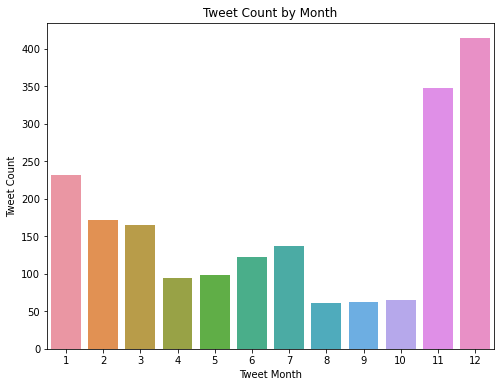

In [1378]:
#Make bar plot of tweet count by month
plt.figure(figsize=(8,6))
ax = sns.countplot(x = df_twt_arch_m.tweet_month)
ax.set(xlabel='Tweet Month', ylabel='Tweet Count', title = 'Tweet Count by Month')

* **Above, during the period between 2015-11-15 and 2017-08-01 November and December had the most tweets from We Rate Dogs. This may be because Thanksgiving and Christmas are in November and December.**

* **August, September and October had the least tweets, but it may be because only one set of August, September and October data were recorded in this dataset, compared with two sets for the other months.**

[Text(0.5, 0, 'Favorite Count'),
 Text(0, 0.5, 'Number of Tweets'),
 Text(0.5, 1.0, 'Number of Tweets by Favorite Count')]

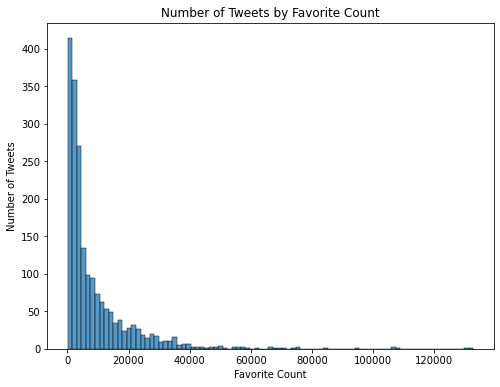

In [1379]:
#Make histogram of Number of Tweets by Favorite Count
plt.figure(figsize=(8,6))
ax1 = sns.histplot(df_twt_arch_m.favorite_count)
ax1.set(xlabel='Favorite Count', ylabel='Number of Tweets' , title = 'Number of Tweets by Favorite Count')

* **Above, we can see that the histogram for the Number of Tweets by Favorite Count is a right skewed graph.**
* **Most tweets for We Rate Dogs have less than 20,000 favorite counts.**
* **More than 400 tweets have 0 favorite count.**

[Text(0.5, 0, 'Tweet Month'),
 Text(0, 0.5, 'Favorite Count'),
 Text(0.5, 1.0, 'Distribution of Favorite Count By Tweet Month')]

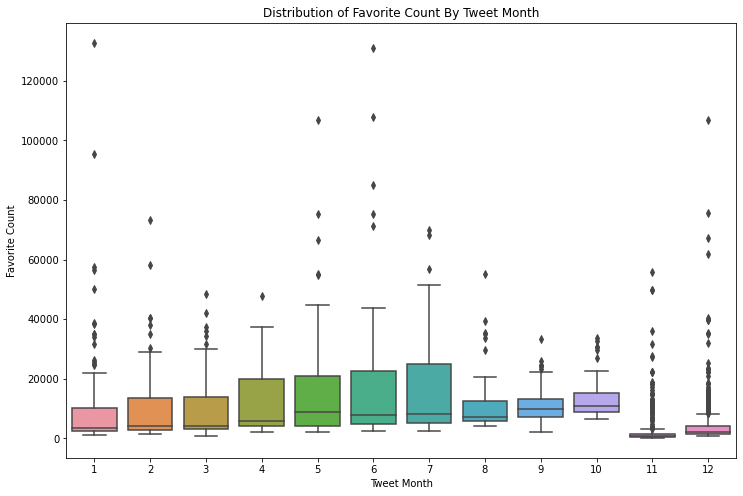

In [1380]:
#make boxplot of favorite count by tweet month
plt.figure(figsize=(12,8))
ax2 = sns.boxplot(x='tweet_month',y='favorite_count',data=df_twt_arch_m)
ax2.set(xlabel='Tweet Month', ylabel='Favorite Count', title = 'Distribution of Favorite Count By Tweet Month')

* **November has the largest proportion of tweets with 0 favorite count.**
* **June has the widest spread in distribution of favorite count values, January is a close second.**
* **October has the highest median favorite count.**